<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage

Download the webpage at the url


In [3]:
#your code goes here

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# get the contents of the webpage in text format and store in a variable called data
data  = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    language = cols[1].getText() # store the value in column 2 as language
    avg_salary = cols[3].getText() # store the value in column 3 as avg_salary
    print("{}--->{}".format(language,avg_salary))

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [20]:
import pandas as pd

# Create an empty list to store the data
data = []

# Pass language and avg_salary info into the list
for row in table.find_all('tr'):
    cols = row.find_all('td')
    language = cols[1].getText()
    avg_salary = cols[3].getText()
    data.append([language, avg_salary])
    
# Create the DataFrame
result = pd.DataFrame(data, columns=["Language", "Average Annual Salary"])
result = result.iloc[1:].reset_index(drop=True) # remove the first row of the df since it duplicates the header.

# Print the DataFrame
result

,Language,Average Annual Salary
0,Python,"$114,383"
1,Java,"$101,013"
2,R,"$92,037"
3,Javascript,"$110,981"
4,Swift,"$130,801"
5,C++,"$113,865"
6,C#,"$88,726"
7,PHP,"$84,727"
8,SQL,"$84,793"
9,Go,"$94,082"


In [21]:
# your code goes here
result.to_csv('popular-languages.csv', index='False')

In [35]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.5.3


In [26]:
#step 1: sort and clean data
result['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
result['Average Annual Salary'] = result['Average Annual Salary'].astype(float)
result.sort_values('Average Annual Salary', ascending=True, inplace=True)
#del df['0']
df = result.set_index('Language')
df

,Average Annual Salary
Language,
PHP,84727.0
SQL,84793.0
C#,88726.0
R,92037.0
Go,94082.0
Java,101013.0
Javascript,110981.0
C++,113865.0
Python,114383.0


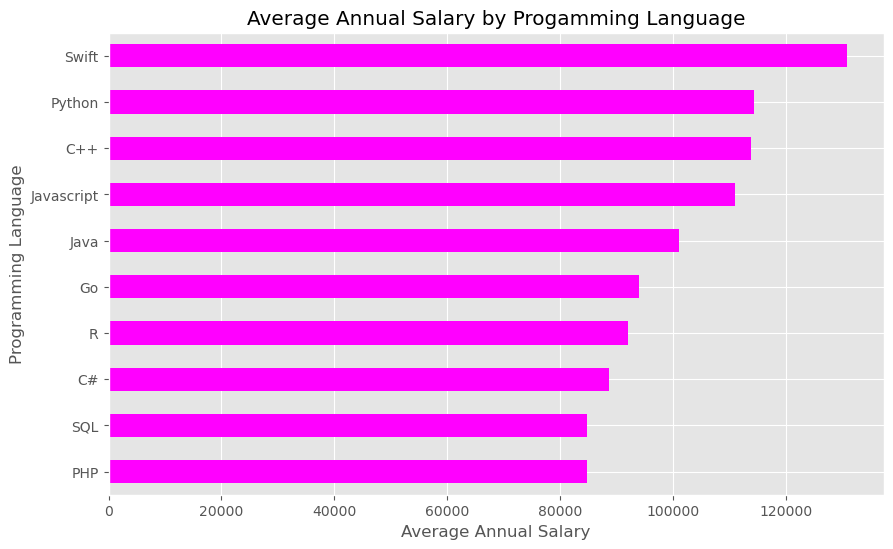

In [38]:
# step 2: plot data
df.plot(kind='barh', figsize=(10, 6), color = 'magenta')
plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Programming Language') # add y-label to the plot
plt.title('Average Annual Salary by Progamming Language') # add title to the plot
plt.legend().remove()
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
